In [1]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

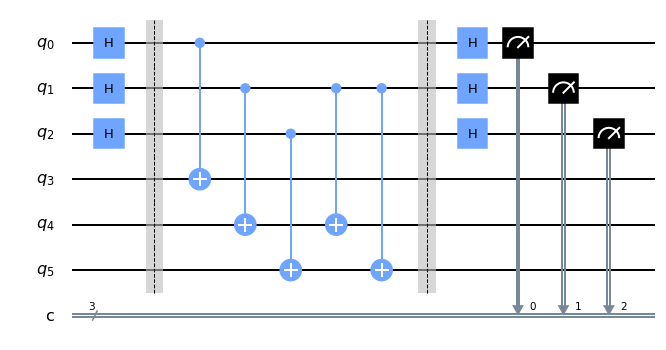

In [2]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

simon_circuit.h(range(n))

simon_circuit.barrier()

simon_circuit += simon_oracle(b)

simon_circuit.barrier()

simon_circuit.h(range(n))

simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

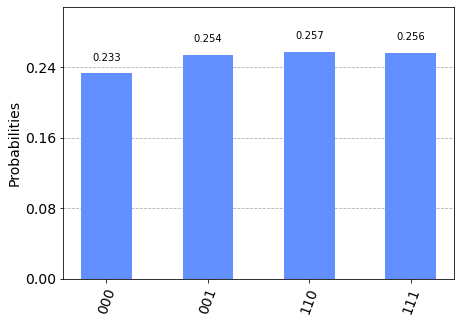

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print('{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)))

110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
110.111 = 0 (mod 2)


## Experiment with Real Devices

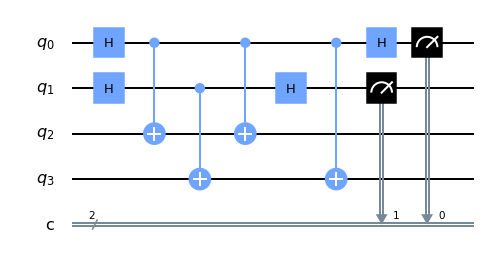

In [6]:
b = '11'

n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

simon_circuit_2.h(range(n))

simon_circuit_2 += simon_oracle(b)

simon_circuit_2.h(range(n))

simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw('mpl')

C:\Users\hostaf\anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_ourense
Job Status: job has successfully run


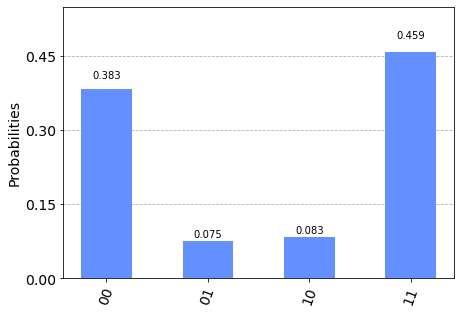

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                                      and not x.configuration().simulator
                                      and x.status().operational==True))
print("least busy backend: ", backend)

from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit_2, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval=2)

device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [9]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = '+b)
for z in device_counts:
    print('{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (38.3%)
11.01 = 1 (mod 2) (7.5%)
11.10 = 1 (mod 2) (8.3%)
11.11 = 0 (mod 2) (45.9%)
